# Multimedia Security and Privacy
## TP 3
Tientso Ning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
#confirm some properties
norm.cdf(1) == 1-norm.cdf(-1)

True

In [4]:
#Exercise 1
print("P[-2 < Y < 1] =", norm.cdf(1, loc=0, scale=3) - norm.cdf(-2, loc=0, scale=3))
print("P[Y > 5.5] =", 1-norm.cdf(5.5, loc=0, scale=3))

P[-2 < Y < 1] = 0.3780661222713134
P[Y > 5.5] = 0.03337650758481725


In [5]:
#Exercise 1
print("P[-2 < X < 2] =", norm.cdf(2)-(1-norm.cdf(2)))
print("P[X > 1.5] =", 1-norm.cdf(1.5))

P[-2 < X < 2] = 0.9544997361036416
P[X > 1.5] = 0.06680720126885809


In [6]:
#Exercise 2
mu = 30
sigma = 11
print("P[X > 35] =", 1-norm.cdf(35, loc=mu, scale=sigma))
print("P[X < 5] =", norm.cdf(5, loc=mu, scale=sigma))
print("P[20 < X < 40] =", norm.cdf(40, loc=mu, scale=sigma)-norm.cdf(20, loc=mu, scale=sigma))

P[X > 35] = 0.32471814186337733
P[X < 5] = 0.01152131004388092
P[20 < X < 40] = 0.6366978591131021


In [7]:
#Exercise 3
#P[|X| < 10] = 0.3 -> P[-10 < X < 10] = 0.3 -> P[ -10/theta < X/theta < 10/theta] = 0.3
#norm.cdf(10/theta, loc=mu, scale =?) - (1-norm.cdf(10/theta, loc=mu, scale=?)) = 0.3
#2*norm.cdf(10/theta) - 1 = 0.3 -> 2*norm.cdf(10/theta, loc=0, scale=?) = 0.65
theta = 10/norm.ppf(0.65)
norm.cdf(10, loc=0, scale=25.95)-norm.cdf(-10, loc=0, scale=theta)

0.30001332994289687

That value confirms that we found the correct theta value

In [127]:
#Exercise 4
from scipy import special
x = norm.rvs()
print(special.erfc(x) == 1-special.erf(x)) #erf is the complement of erfc
print(norm.sf(x) == 1-norm.cdf(x)) #Qfunction is the complement of CDF
print(0.5*special.erfc(x/np.sqrt(2))) #the definition of Q(n) given
print(0.5*special.erfc(x/np.sqrt(2)) == norm.sf(x)) #they are equivalent

True
True
0.5049342644276007
True


In [22]:
#Exercise 5
Z = np.random.random() #distribution from normal
H0 = Z
mu = 1
H1 = mu + Z

#determine the separation threshold
thresh = norm.pdf(H1)/norm.pdf(H0)

#determine the probability of correct detection
pm = norm.cdf(thresh-mu)
pf = 1 - norm.cdf(thresh)
pm = (pf + pm)
ps = 1 - pm
print("If the threshold is {0}, then the probability of correct detection is: ".format(thresh), ps)

If the threshold is 0.22998679773673578, then the probability of correct detection is:  0.3703029550370346


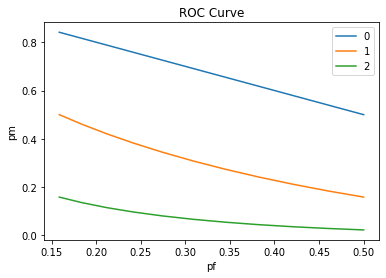

In [10]:
#Exercise 6
Z = np.random.random() #distribution from normal

pd_ = []
for v in range (0,3):
    H0 = Z
    H1 = v + Z
    x = []
    y = []
    for i in range(0, 11):

        thresh = 0.1*i

        pm = norm.cdf(thresh-v)
        pf = 1 - norm.cdf(thresh)
        pd = 1 - (pm + pf)

        x.append(pf)
        y.append(pm)
        pd_.append(pd)
    
    plt.plot(x,y, label="{0}".format(v))
    
plt.xlabel("pf")
plt.ylabel("pm")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [11]:
print(pd_[0:11])
print(pd_[11:23])
print(pd_[23:])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.3413447460685429, 0.35576771193026957, 0.36740431085570635, 0.37594776996587964, 0.3811686238602505, 0.38292492254802624, 0.3811686238602505, 0.37594776996587953, 0.36740431085570635, 0.35576771193026946, 0.3413447460685429, 0.4772498680518208]
[0.5111112774610271, 0.5433293903261772, 0.5733459594304096, 0.6006224499107662, 0.624655260005155, 0.6449902230161554, 0.6612358631913166, 0.6730749311948951, 0.6802738137068578, 0.6826894921370859]


As we can see, the more separation (meaning the mean increasing from 0->2) the easier it is to separate and predict the values, and we can see that pd significantly increases compared to pf.

In [124]:
#Exercise 7

alpha = 0.1
X = np.random.binomial(1,0.5,size=1000)
V = np.random.exponential(size=1000)
W = np.random.exponential(size=1000)

#hypothesis
H0 = W
H1 = V*X + W

#minimize perr
ratio = H0/H1

In [126]:
ratio

array([0.80416836, 0.34787984, 0.60011614, 0.95821729, 1.        ,
       1.        , 0.77987666, 0.21672104, 1.        , 0.79724172,
       0.93392316, 0.39583814, 1.        , 0.19759136, 0.61670537,
       1.        , 0.13566689, 0.36975021, 1.        , 1.        ,
       0.78110295, 0.71257325, 1.        , 0.50824509, 1.        ,
       0.02939614, 0.91916565, 0.90226303, 0.01245768, 0.62821692,
       0.27174629, 1.        , 1.        , 1.        , 0.54781076,
       1.        , 0.67522922, 0.94577825, 0.48097383, 1.        ,
       0.08883207, 0.10840506, 0.73008318, 0.48112476, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.91901034, 1.        , 0.60293483, 1.        ,
       1.        , 0.91036241, 1.        , 0.50067974, 1.        ,
       0.13903082, 0.24330761, 1.        , 0.31289937, 1.        ,
       1.        , 1.        , 0.45860469, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.94244495, 0.60524

Here we can see that when X = 0 as part of the bernoulli distribution,, it is inseparable.
Therefore the only optimum decision rule to minimize perr is the threshold `theta = 1.0`